# FDA_pratice
> Contributed by `shihyuuuuuuu`<br>

## Description

This notebook is a practice for course "Fundamental of Data Analytics".<br>
[HW1 requirements](https://github.com/silenceliang/FDA_practice/blob/master/README.md#3-plot-pandas-series-dataframe-time-date)

## Loading datasets

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/Reviews_10000.csv')

## A glimpse of the dataset
**For this homework, please use the first 10000 rows.**

In [2]:
pd_data = data
pd_data.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## 1. Top-10 Reviewer

- Sort by number of reviews (hint : "ProfileName", "UserId")
- Also, show his/her average score

In [3]:
# Group the same users with 'UserId' and count their size.
user_group = pd_data.groupby(['UserId'])
user_count = user_group.size()
user_count = user_count.reset_index(name='Count')

# Sort the users descendingly by their counts, and get the top-10 reviewers.
top_ten_user = list(user_count.sort_values(by=['Count'], ascending=False)[:10].UserId)
print("Users with the most reviews:\n", top_ten_user)

Users with the most reviews:
 ['A1Z54EM24Y40LL', 'A2SZLNSI5KOQJT', 'A35R32TA60XD57', 'A281NPSIMI1C2R', 'A3OXHLG6DIBRW8', 'A3NHUQ33CFH3VM', 'A3PJZ8TU8FDQ1K', 'AQ6SHOW0VMZGF', 'A26NFIQ7KWI8Y7', 'A10H24TDLK2VDP']


In [4]:
top_reviewers = { 'UserId': [], 'ProfileName': [], 'Score count': [],'Score mean': []}

# A function to compute the count and mean of the scores of each user
def compute_score_count(df, userid, output_dict):
    user_data = df.loc[df['UserId'] == userid]
    count = user_data.shape[0]
    profile_name = user_data['ProfileName'].values[0]
    score_mean = np.mean(user_data['Score'].values)
    top_reviewers['UserId'].append(userid)
    top_reviewers['ProfileName'].append(profile_name)
    top_reviewers['Score count'].append(count)
    top_reviewers['Score mean'].append(score_mean)

# Apply the function to each of the ten users
for user in top_ten_user:
    compute_score_count(pd_data, user, top_reviewers)

output = pd.DataFrame(top_reviewers)
output.head(10)

,UserId,ProfileName,Score count,Score mean
0,A1Z54EM24Y40LL,c2,17,3.882353
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,A35R32TA60XD57,M. Torma,9,4.111111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
5,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
7,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
8,A26NFIQ7KWI8Y7,kt rose,6,2.666667
9,A10H24TDLK2VDP,William Jens Jensen,6,3.000000


## 2. Plot score distribution for the user with the most number of reviews

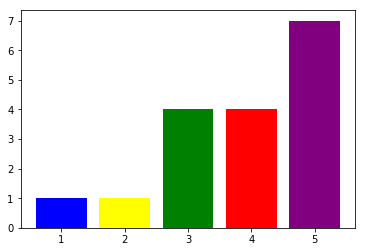

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get the top user and count his scores
top_user = pd_data.loc[pd_data['ProfileName'] == 'c2']
y = [list(top_user['Score']).count(i) for i in range(1,6)]

# Draw the bar chart of the score distribution
plt.bar(range(1,6), y, color=['blue', 'yellow', 'green', 'red', 'purple'])
plt.show()

## 3. Plot pandas Series DataFrame (Time->Date)

- axis-X : Date of reviews (transfer column "Time" -> Date)
- axis-Y : Numbers of reviews in the date interval
- Type : Bar graph

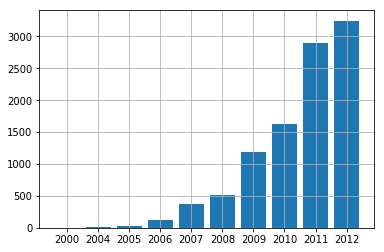

In [6]:
import time

# Because there are too many different dates, I group them by 'Year'.
dates = []
for i in pd_data['Time']:
    #dates.append(time.strftime('%Y-%m-%d', time.localtime(i)))
    dates.append(time.strftime('%Y', time.localtime(i)))
    
dates = pd.DataFrame(dates)
group = dates.groupby(0)

# Plot a bar chart. x_axis = 'Year', y_axis = 'review-count'
plt.bar(group.size().index, group.size())
plt.grid()
plt.show()

## 4. Plot HeatMap using seaborn

- Correlation between numeric features (Id, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time)

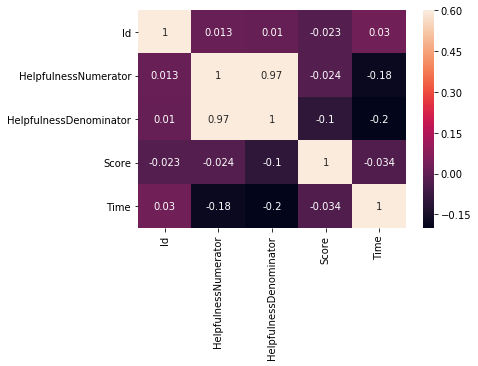

In [7]:
import seaborn as sns

# Get the column of each attribute
Id = pd_data['Id']
HelpfulnessNumerator = pd_data['HelpfulnessNumerator']
HelpfulnessDenominator = pd_data['HelpfulnessDenominator']
Score = pd_data['Score']
Time = pd_data['Time']

# Combine each series into a dataframe
df = pd.concat([Id, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time], axis=1)

# Calculate the correlation coefficients between every two attributes
correlation = np.corrcoef([df['Id'], df['HelpfulnessNumerator'], df['HelpfulnessDenominator'], df['Score'], df['Time']])

# Create new dataframe by the correlation matrix
df = pd.DataFrame(correlation)
df.columns = ['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']
df.index = ['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']

# Draw a heatmap of the dataframe
sns.heatmap(df, annot=True, vmin=-0.2, vmax=0.6)

## 5. Helpful percent

- If viewers of that comment upvote the comment, then it adds to Helpfulness numerator.
- If viewers of that comment just make a comment, then it adds to Helpfulness denominator.
- **Note : you should filter out some cases with numerator > denominator**
- Plot the distribution of helpful percent (hint: .hist())
- If denominator == 0 or numerator == 0, output == -1

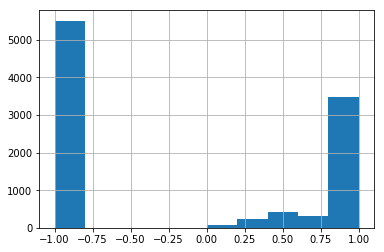

In [8]:
percent = []

for numerator, denominator in zip(pd_data['HelpfulnessNumerator'], pd_data['HelpfulnessDenominator']):
    if denominator == 0 or numerator == 0: # deal with cases with 'ZeroDivisionError'
        percent.append(-1)
    elif numerator > denominator: # filter out the cases with numerator > denominator
        pass
    else:
        percent.append(numerator/denominator)
plt.hist(percent)
plt.grid()
plt.show()